In [64]:
# from sklearn.linear_model import LogisticRegression 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, precision_recall_fscore_support, roc_curve



#sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, s, f = precision_recall_fscore_support(y_true, y_pred)
    return r[0]



df = pd.read_csv("https://sololearn.com/uploads/files/titanic.csv")




df['male'] = df['Sex'] == 'male'

X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
sensitivity_score = recall_score



print(sum(y_pred))
print(model.score(X_test, y_test))
print('accuracy_score:', accuracy_score(y_test, y_pred))


print('precision_score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))

print('confusion matrix:', confusion_matrix(y_test, y_pred))



print('sensitivity_score: ', sensitivity_score(y_test, y_pred))
print('specificity: ', specificity_score(y_test, y_pred))
print('predict proba:')
model.predict_proba(X_test)


y_pred = model.predict_proba(X_test)[:, 1] > 0.75




print('precision_score:', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))


67
0.8333333333333334
accuracy_score: 0.8333333333333334
precision_score: 0.835820895522388
f1_score: 0.7516778523489933
confusion matrix: [[129  11]
 [ 26  56]]
sensitivity_score:  0.6829268292682927
specificity:  0.9214285714285714
predict proba:
precision_score: 0.9230769230769231
recall:  0.43902439024390244


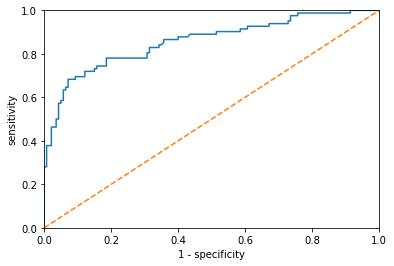

In [5]:
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, precision_recall_fscore_support, roc_curve



df = pd.read_csv("https://sololearn.com/uploads/files/titanic.csv")
df['male'] = df['Sex'] == 'male'

X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [56]:
# Building a Model with kfold

from sklearn.model_selection import KFold
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("https://sololearn.com/uploads/files/titanic.csv")

df['male'] = df['Sex'] == 'male'

X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()


# creating a model with Kfold instead of train_test_split function

kf = KFold(n_splits=5, shuffle=True)

#for train, test in Kf.split(X):
        #train, test
splits = list(kf.split(X))
first_split = splits[0]
train_indices, test_indices = first_split


X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]


model.fit(X_train, y_train)
print(model.score(X_test, y_test))



0.8146067415730337


In [8]:
kf = KFold(n_splits=3, shuffle=True) 
splits = list(kf.split(X)) 
print("splits:", splits) 
first_split = splits[0] 
print("first split:", first_split) 
train_indices, test_indices = first_split 
print("training set indices:", train_indices) 
print("test set indices:", test_indices)

splits: [(array([  1,   2,   6,   7,   9,  10,  12,  13,  14,  15,  17,  18,  19,
        23,  24,  25,  26,  27,  30,  31,  33,  35,  37,  38,  39,  42,
        44,  45,  47,  49,  50,  52,  53,  54,  55,  57,  58,  59,  60,
        61,  63,  64,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  83,  84,  85,  88,  89,  90,  91,
        94,  96,  97,  98, 103, 105, 106, 107, 108, 109, 110, 111, 113,
       114, 115, 117, 119, 121, 123, 126, 129, 130, 132, 133, 134, 135,
       136, 137, 138, 141, 145, 146, 147, 148, 152, 153, 154, 155, 157,
       158, 159, 160, 162, 165, 167, 168, 170, 171, 172, 174, 175, 176,
       177, 178, 179, 181, 183, 184, 187, 188, 190, 192, 193, 194, 195,
       196, 198, 200, 201, 202, 204, 206, 207, 208, 209, 210, 212, 214,
       217, 219, 221, 222, 223, 225, 227, 228, 229, 230, 231, 233, 235,
       236, 237, 238, 239, 240, 242, 244, 245, 247, 248, 249, 250, 251,
       253, 254, 255, 256, 257, 258, 260, 261, 264, 26

In [22]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

Score = []
Kf = KFold(n_splits = 5, shuffle = True)

for train_index, test_index in Kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    Score.append(model.score(X_test, y_test))
    
#print(np.mean(Score))

#print(train_index)

#print(test_index)


0.8049605411499436


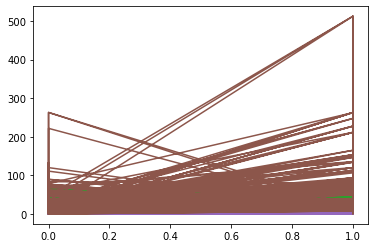

In [52]:
# final model


final_model = LogisticRegression()
final_model.fit(X, y)
print(final_model.predict(X))
print(final_model.score(X, y))

In [72]:
# Model Comparison Building the Models with Scikit-learn


from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'


kf = KFold(n_splits=5, shuffle=True)


# create three different feature matrices X1, X2 and X3. All will have the same target y
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values




def score_model(X, y, kf):
    accuracy_scores = [] 
    precision_scores = [] 
    recall_scores = [] 
    f1_scores = [] 
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index] 
        model = LogisticRegression(random_state = 0) 
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test) 
        accuracy_scores.append(accuracy_score(y_test, y_pred)) 
        precision_scores.append(precision_score(y_test, y_pred)) 
        recall_scores.append(recall_score(y_test, y_pred)) 
        f1_scores.append(f1_score(y_test, y_pred))
    
    print("accuracy:", np.mean(accuracy_scores)) 
    print("precision:", np.mean(precision_scores)) 
    print("recall:", np.mean(recall_scores)) 
    print("f1 score:", np.mean(f1_scores))
    
print('Logistic Regression with all the features')
score_model(X1, y, kf)
print()

print('Logistic Regression with Pclass, male, age')
score_model(X2, y, kf)
print()

print('Logistic Regression with Fare and age ')
score_model(X3, y, kf)

"""if we compare the first two models, they have almost identical scores. The third model has lower scores for all four metrics. The first two are thus much better options than the third. This matches intuition since the third model doesn’t have access to the sex of the passenger. Our expectation is that women are more likely to survive, so having the sex would be a very valuable predictor.
 Since the first two models have equivalent results, it makes sense to choose the simpler model, the one that uses the Pclass, Sex & Age features.
 Now that we’ve made a choice of a best model, we build a single final model using all of the data."""






Logistic Regression with all the features
accuracy: 0.8004253158128611
precision: 0.7683491107596994
recall: 0.6982618861651847
f1 score: 0.7277180784295132

Logistic Regression with Pclass, male, age
accuracy: 0.7948517742652192
precision: 0.7461180401104379
recall: 0.7064699792960663
f1 score: 0.7253676691729323

Logistic Regression with Fare and age 
accuracy: 0.6561543832920714
precision: 0.6565293836598184
recall: 0.2316822182516048
f1 score: 0.3411160463339298


'if we compare the first two models, they have almost identical scores. The third model has lower scores for all four metrics. The first two are thus much better options than the third. This matches intuition since the third model doesn’t have access to the sex of the passenger. Our expectation is that women are more likely to survive, so having the sex would be a very valuable predictor.\n Since the first two models have equivalent results, it makes sense to choose the simpler model, the one that uses the Pclass, Sex & Age features.\n Now that we’ve made a choice of a best model, we build a single final model using all of the data.'

In [74]:
# Using all the model

model = LogisticRegression()
model.fit(X1, y)

model.predict([[3, False, 25, 0, 1, 2]])

# Survived

array([1], dtype=int64)

In [69]:
# Using the best model

model = LogisticRegression()
model.fit(X2, y)

model.predict([[3, False, 25]])

# Survived

array([1], dtype=int64)

In [76]:
# Using the worst model

model = LogisticRegression()
model.fit(X3, y)

model.predict([[25, 2]])

# Did not Survive

array([0], dtype=int64)

In [ ]:
tp, fp, fn, tn = [int(x) for x in input().split()]


total = tp + fp + fn + tn
Accuracy = (tp + tn) / total
Precision = tp / (tp + fp)
recall = tp / (tp + fn)
F1_score = 2 * Precision * recall / (Precision + recall)


print(round(Accuracy, 4))
print(round(Precision, 4))
print(round(recall, 4))
print(round(F1_score, 4))


In [2]:
# creating a model with decision tree class

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

df = pd.read_csv("https://sololearn.com/uploads/files/titanic.csv")




df['male'] = df['Sex'] == 'male'

X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = DecisionTreeClassifier()

kf = KFold(n_splits=5, shuffle=True)



for criterion in ['gini','entropy']:
    print(f"Decision tree - {criterion}")
    recall = []
    accuracy = []
    precision = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion = criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    

    print('accuracy: ', np.mean(accuracy))
    print('recall: ', np.mean(recall))
    print('precision: ', np.mean(precision))
    
    

#model.fit(X_train, y_train)


#print('Accuracy: ', model.score(X_test, y_test))

#y_pred = model.predict(X_test)

#print('recall_score :', recall_score(y_test, y_pred))
#print('precision_score :',  precision_score(y_test, y_pred))
#print('F1_score :', f1_score(y_test, y_pred))

Decision tree - gini
accuracy:  0.7231638418079096
recall:  0.6901408450704225
precision:  0.6447368421052632
Decision tree - entropy
accuracy:  0.768361581920904
recall:  0.6271186440677966
precision:  0.6607142857142857


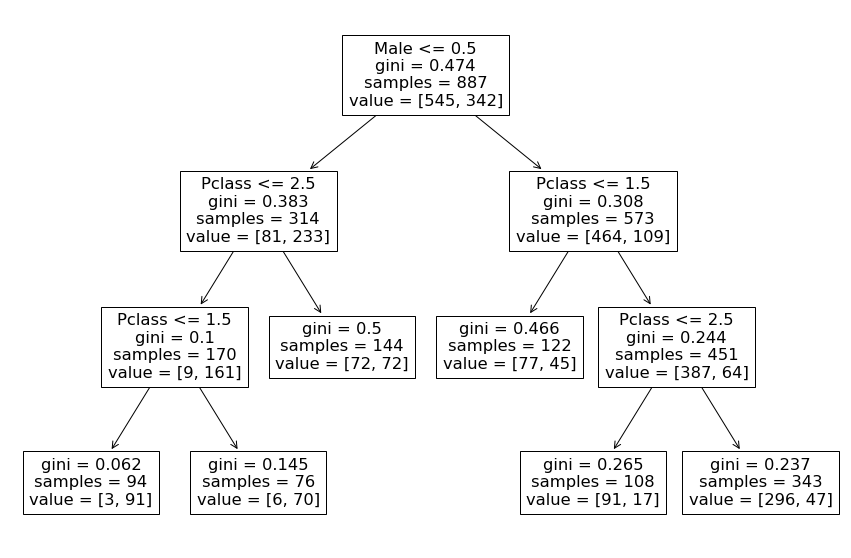

In [1]:
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
import pandas as pd


df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv') 
df['Male'] = df['Sex'] == 'male' 
feature_names = ['Pclass', 'Male'] 
X = df[feature_names].values 
y = df['Survived'].values 
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2, max_leaf_nodes = 10) 
dt.fit(X, y) 
fig = plt.figure(figsize=(15,10)) 
tree.plot_tree(dt, feature_names=feature_names) 
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import pandas as ad
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv') 
df['male'] = df['Sex'] == 'male' 

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')

X = df([['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values)
y = df(['Survived'].values)

In [5]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score


df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv') 
df['Male'] = df['Sex'] == 'male' 
feature_names = ['Pclass', 'Male'] 
X = df[feature_names].values 
y = df['Survived'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y)
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2, max_leaf_nodes = 10) 
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)



print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Recall: ', recall_score(y_pred, y_test))
print('Precison: ', precision_score(y_pred, y_test))

Accuracy:  0.7342342342342343
Recall:  0.94
Precison:  0.4563106796116505


In [20]:
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score





df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['Male'] = df['Sex'] == 'male'

X = df[['Pclass', 'Male']].values
y = df['Survived'].values

param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()

gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)

gs.fit(X, y)

#print('best params: ', gs.best_params_)
print('best score: ', gs.best_score_)

best score:  0.6506779917168288
